In [45]:
import tensorflow as tf

tf.__version__ ,  tf.keras.__version__

('2.19.0', '3.9.2')

In [46]:
X = tf.range(-100, 100 , 2)
y  = X+10


len(X),  len(y)

X , y

(<tf.Tensor: shape=(100,), dtype=int32, numpy=
 array([-100,  -98,  -96,  -94,  -92,  -90,  -88,  -86,  -84,  -82,  -80,
         -78,  -76,  -74,  -72,  -70,  -68,  -66,  -64,  -62,  -60,  -58,
         -56,  -54,  -52,  -50,  -48,  -46,  -44,  -42,  -40,  -38,  -36,
         -34,  -32,  -30,  -28,  -26,  -24,  -22,  -20,  -18,  -16,  -14,
         -12,  -10,   -8,   -6,   -4,   -2,    0,    2,    4,    6,    8,
          10,   12,   14,   16,   18,   20,   22,   24,   26,   28,   30,
          32,   34,   36,   38,   40,   42,   44,   46,   48,   50,   52,
          54,   56,   58,   60,   62,   64,   66,   68,   70,   72,   74,
          76,   78,   80,   82,   84,   86,   88,   90,   92,   94,   96,
          98], dtype=int32)>,
 <tf.Tensor: shape=(100,), dtype=int32, numpy=
 array([-90, -88, -86, -84, -82, -80, -78, -76, -74, -72, -70, -68, -66,
        -64, -62, -60, -58, -56, -54, -52, -50, -48, -46, -44, -42, -40,
        -38, -36, -34, -32, -30, -28, -26, -24, -22, -20, -18, -

In [47]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X.numpy(),y.numpy() ,train_size=0.8, random_state=42, shuffle=False)

len(X_train), len(X_test), len(y_train), len(y_test)


(80, 20, 80, 20)

In [53]:
# build the model

tf.random.set_seed(42)

my_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], activation="relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


loss_fn = tf.keras.losses.MeanAbsoluteError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

my_model.compile(loss=loss_fn, optimizer=optimizer, metrics=["mae"])

history = my_model.fit(X_train, y_train, epochs=200)

Epoch 1/200


/Users/sachinmurali/anaconda3/envs/pytorch/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34.5909 - mae: 34.5909  
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.1387 - mae: 30.1387 
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.8156 - mae: 25.8156
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.5893 - mae: 21.5893
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.4592 - mae: 17.4592
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.8125 - mae: 13.8125
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.4705 - mae: 11.4705
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.0161 - mae: 12.0161
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.4253 - mae: 11.4253
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.4016 - mae: 9.4016
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.4380 - mae: 8.4380
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.2638 - mae: 8.2638
Epoch 13/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - 

In [49]:
# loss: 4.6272 - mae: 4.6272
# after relu -->  loss: 3.5025 - mae: 3.5025
# loss: 2.3553 - mae: 2.3553
#loss: 0.7732 - mae: 0.7732
# loss: 0.3862 - mae: 0.3862

In [50]:
my_model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3458 - mae: 0.3458


[0.34575384855270386, 0.34575384855270386]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


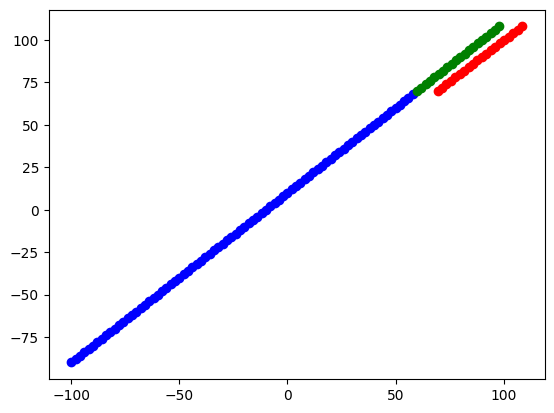

In [52]:
# visualize
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, c="b")
plt.scatter(X_test,y_test, c="g")
plt.scatter(my_model.predict(X_test), y_test, c="r")


<Axes: >

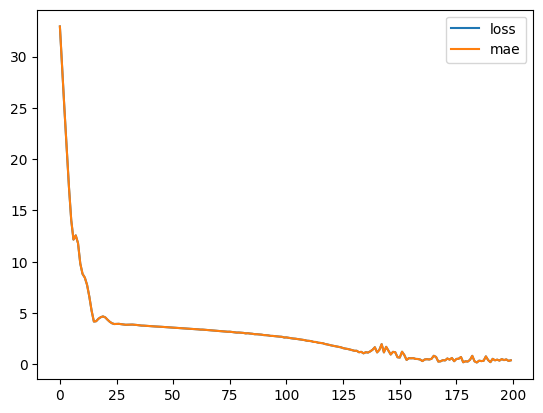

In [56]:
import pandas as pd

pd.DataFrame(history.history).plot()

In [82]:
my_model.save_weights("my_model_weights/my_model.weights.h5")

In [83]:
new_model= tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], activation="relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
loss_fn = tf.keras.losses.MeanAbsoluteError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

new_model.compile(loss=loss_fn, optimizer=optimizer, metrics=["mae"])


/Users/sachinmurali/anaconda3/envs/pytorch/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
my_model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.3848 - mae: 0.3848


[0.3847946226596832, 0.3847946226596832]

In [85]:
new_model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 84.7984 - mae: 84.7984


[84.79835510253906, 84.79835510253906]

In [86]:
new_model.load_weights("my_model_weights/my_model.weights.h5")

/Users/sachinmurali/anaconda3/envs/pytorch/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [87]:
new_model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3848 - mae: 0.3848


[0.3847946226596832, 0.3847946226596832]

In [89]:
my_model.save("my_model_weights/my_model.keras")

In [91]:
k_model = tf.keras.models.load_model("my_model_weights/my_model.keras")

In [92]:
k_model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.3848 - mae: 0.3848


[0.3847946226596832, 0.3847946226596832]